In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Get RoBERTa Labels

In [2]:
#checkpoint1 = f"cardiffnlp/twitter-roberta-base-sentiment-latest"


#RoBERTa = AutoModelForSequenceClassification.from_pretrained(checkpoint1)
#tokenizer1 = AutoTokenizer.from_pretrained(f"cardiffnlp/twitter-roberta-base-sentiment-latest")

In [3]:
def robertscore(review):
    try:
        clf = pipeline("text-classification", model = RoBERTa, tokenizer = tokenizer1,
                       return_all_scores = True)
        answer = clf(review)
        label_with_max_score = max(answer[0], key=lambda x: x['score'])
        max_label = label_with_max_score['label']
        max_score = label_with_max_score['score']
        return max_label
    except:
        return "positive"

    

In [4]:
#df = pd.read_csv('./Final Results/Result_Product_Reviews_topic.csv')

In [5]:
#df['RoBERTa_lbl'] = df['content'].apply(robertscore)

In [6]:
#df

In [7]:
#df['RoBERTa_lbl'].value_counts()

In [8]:
topic_df = pd.read_csv('./Final Results/Result_Topic_Table.csv')

In [9]:
topic_df.columns = topic_df.columns.str.replace('Topic', 'topic_label')

# Compile Results into 1 Table

In [10]:
#Final_Table = pd.merge(df, 
                      #topic_df, 
                      #on ='topic_label', 
                      #how ='outer')
#Final_Table

In [11]:
Final_Table = pd.read_csv('./Final_Compiled_Reviews.csv')

In [12]:
Final_Table['topic_group'].value_counts()

App Features and Platform        12346
TV Shows and Movies               7733
Price                              391
User Experience and Interface      373
Name: topic_group, dtype: int64

In [13]:
labels = Final_Table['RoBERTa_lbl'].unique()
labels

array(['negative', 'neutral', 'positive'], dtype=object)

In [14]:
Final_Table['review_len'] = Final_Table['content'].astype(str).apply(len)

In [15]:
Final_Table.to_csv('Final_Compiled_Reviews.csv')

# Visualisations

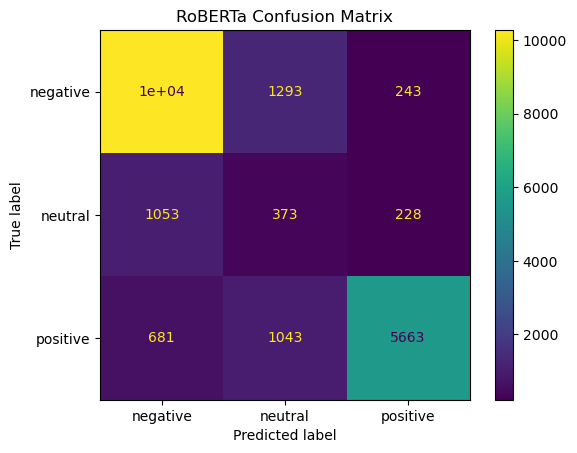

In [16]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

cm = confusion_matrix(Final_Table['act_label'],Final_Table['RoBERTa_lbl'], labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.title('RoBERTa Confusion Matrix')
plt.show()

<Axes: title={'center': 'Distribution Of Positive, Negative and Neutral (Based on Score)'}, ylabel='Count'>

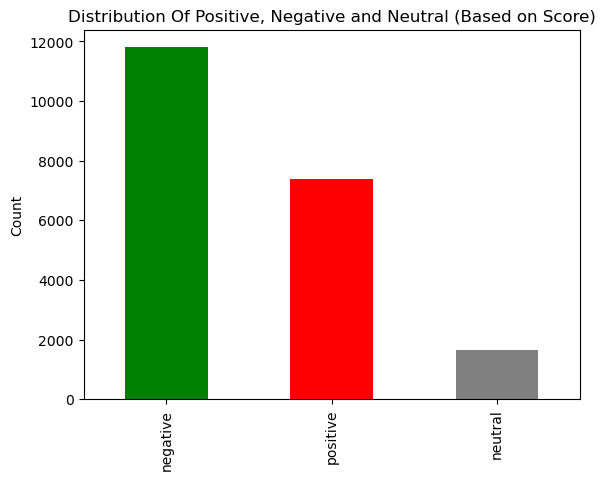

In [17]:
plt.style.context('Solarize_Light2')
Final_Table["act_label"].value_counts().plot(kind='bar',
                                      color=['green','red','grey'],
                                               title='Distribution Of Positive, Negative and Neutral (Based on Score)', 
                                            ylabel = 'Count')

<Axes: title={'center': 'Distribution Of Positive,  Negative and Neutral (RobERTa)'}, ylabel='Count'>

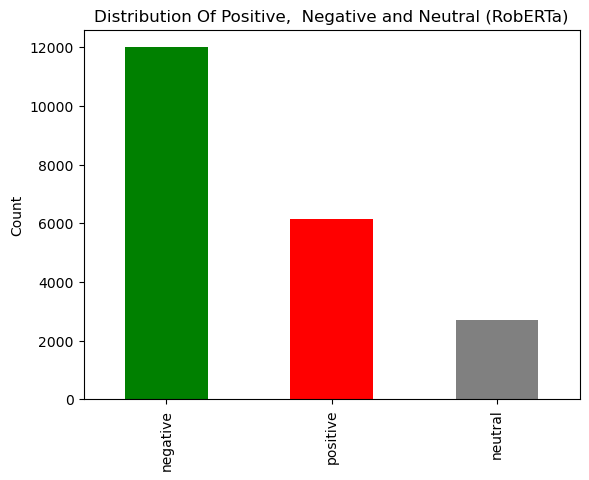

In [18]:
plt.style.context('Solarize_Light2')
Final_Table["RoBERTa_lbl"].value_counts().plot(kind='bar',
                                      color=['green','red','grey'],
                                               title='Distribution Of Positive,  Negative and Neutral (RobERTa)', 
                                            ylabel = 'Count')

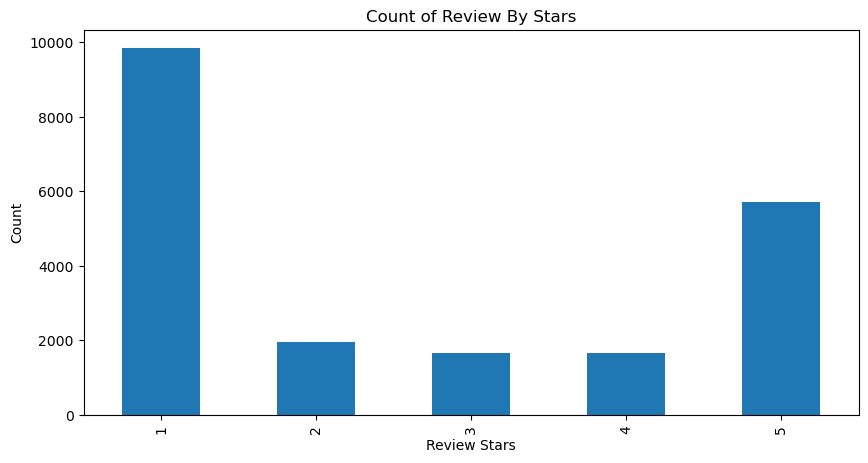

In [19]:
plt.style.context('Solarize_Light2')
ax = Final_Table['score'].value_counts().sort_index().plot(kind='bar',
                                             title = 'Count of Review By Stars',
                                             figsize = (10,5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')
plt.show()

<Axes: title={'center': 'Review Text Length Distribution'}, ylabel='Frequency'>

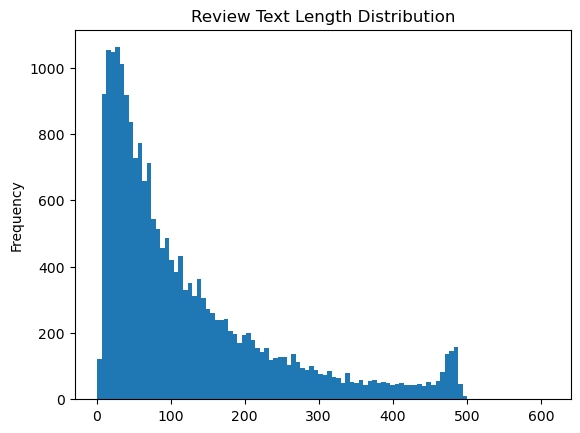

In [20]:
Final_Table['review_len'].plot(
    kind='hist',
    bins=100,
    title='Review Text Length Distribution',
    xlabel = 'No. of Words')

# WordCloud 

In [21]:
topic_UIUX_positive = Final_Table.loc[(Final_Table['topic_group'] == 'User Experience and Interface') &
                                (Final_Table['RoBERTa_lbl'] == 'positive')]
topic_UIUX_neutral = Final_Table.loc[(Final_Table['topic_group'] == 'User Experience and Interface') &
                                (Final_Table['RoBERTa_lbl'] == 'neutral')]
topic_UIUX_negative = Final_Table.loc[(Final_Table['topic_group'] == 'User Experience and Interface') &
                                (Final_Table['RoBERTa_lbl'] == 'negative')]

topic_content_positive = Final_Table.loc[(Final_Table['topic_group'] == 'TV Shows and Movies') &
                                (Final_Table['RoBERTa_lbl'] == 'positive')]
topic_content_neutral = Final_Table.loc[(Final_Table['topic_group'] == 'TV Shows and Movies') &
                                (Final_Table['RoBERTa_lbl'] == 'neutral')]
topic_content_negative = Final_Table.loc[(Final_Table['topic_group'] == 'TV Shows and Movies') &
                                (Final_Table['RoBERTa_lbl'] == 'negative')]

topic_platform_positive = Final_Table.loc[(Final_Table['topic_group'] == 'App Features and Platform') &
                                (Final_Table['RoBERTa_lbl'] == 'positive')]
topic_platform_neutral = Final_Table.loc[(Final_Table['topic_group'] == 'App Features and Platform') &
                                (Final_Table['RoBERTa_lbl'] == 'neutral')]
topic_platform_negative = Final_Table.loc[(Final_Table['topic_group'] == 'App Features and Platform') &
                                (Final_Table['RoBERTa_lbl'] == 'negative')]

topic_price_positive = Final_Table.loc[(Final_Table['topic_group'] == 'Price') &
                                (Final_Table['RoBERTa_lbl'] == 'positive')]
topic_price_neutral = Final_Table.loc[(Final_Table['topic_group'] == 'Price') &
                                (Final_Table['RoBERTa_lbl'] == 'neutral')]
topic_price_negative = Final_Table.loc[(Final_Table['topic_group'] == 'Price') &
                                (Final_Table['RoBERTa_lbl'] == 'negative')]                                      

In [22]:
from wordcloud import WordCloud, STOPWORDS

# Content WordClouds

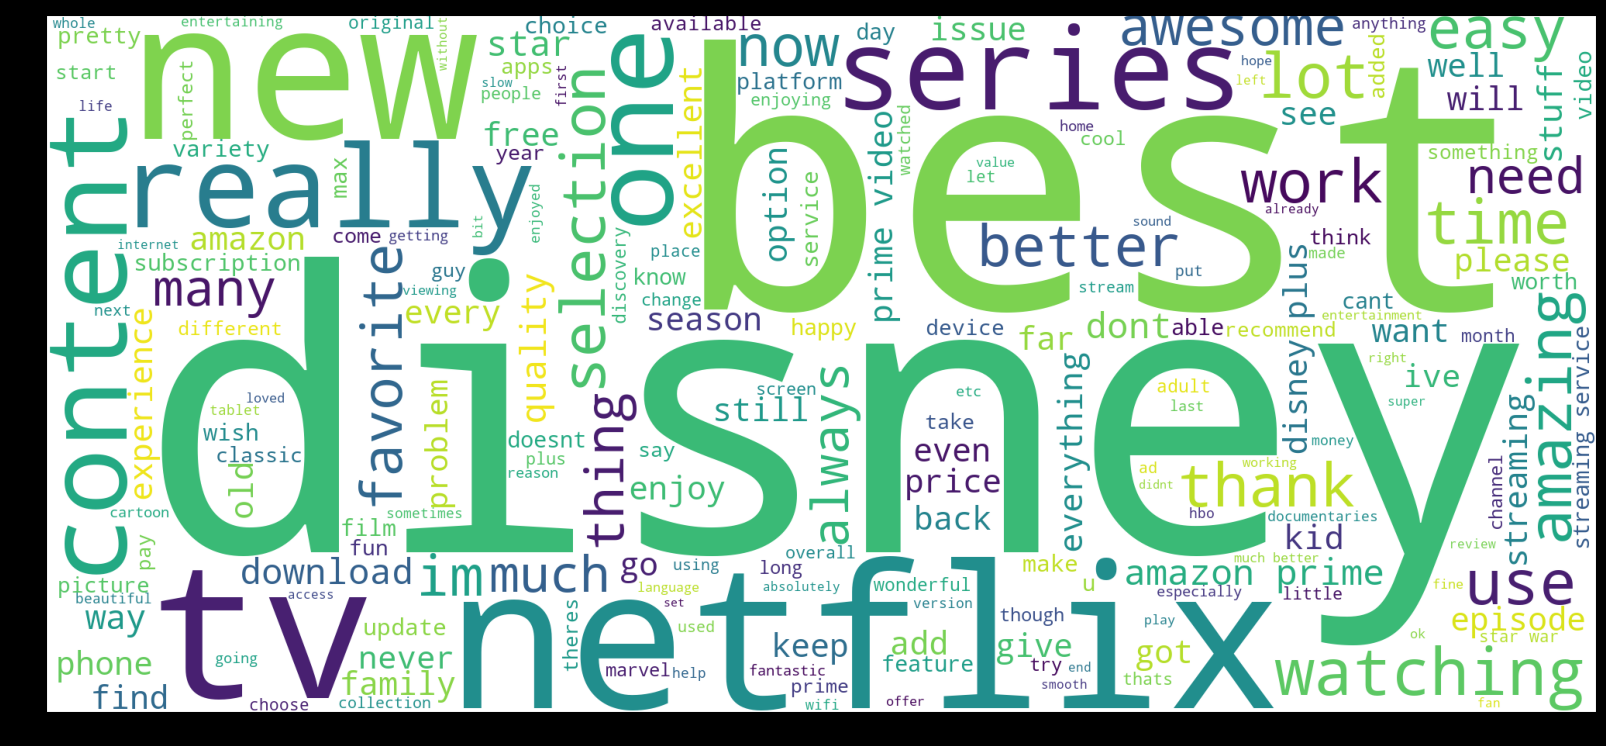

In [23]:
# positive_content_words
stopwords = set(STOPWORDS) # Using stopwords list
positive_content_words = ' '.join([content for content in topic_content_positive['content']])
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(positive_content_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

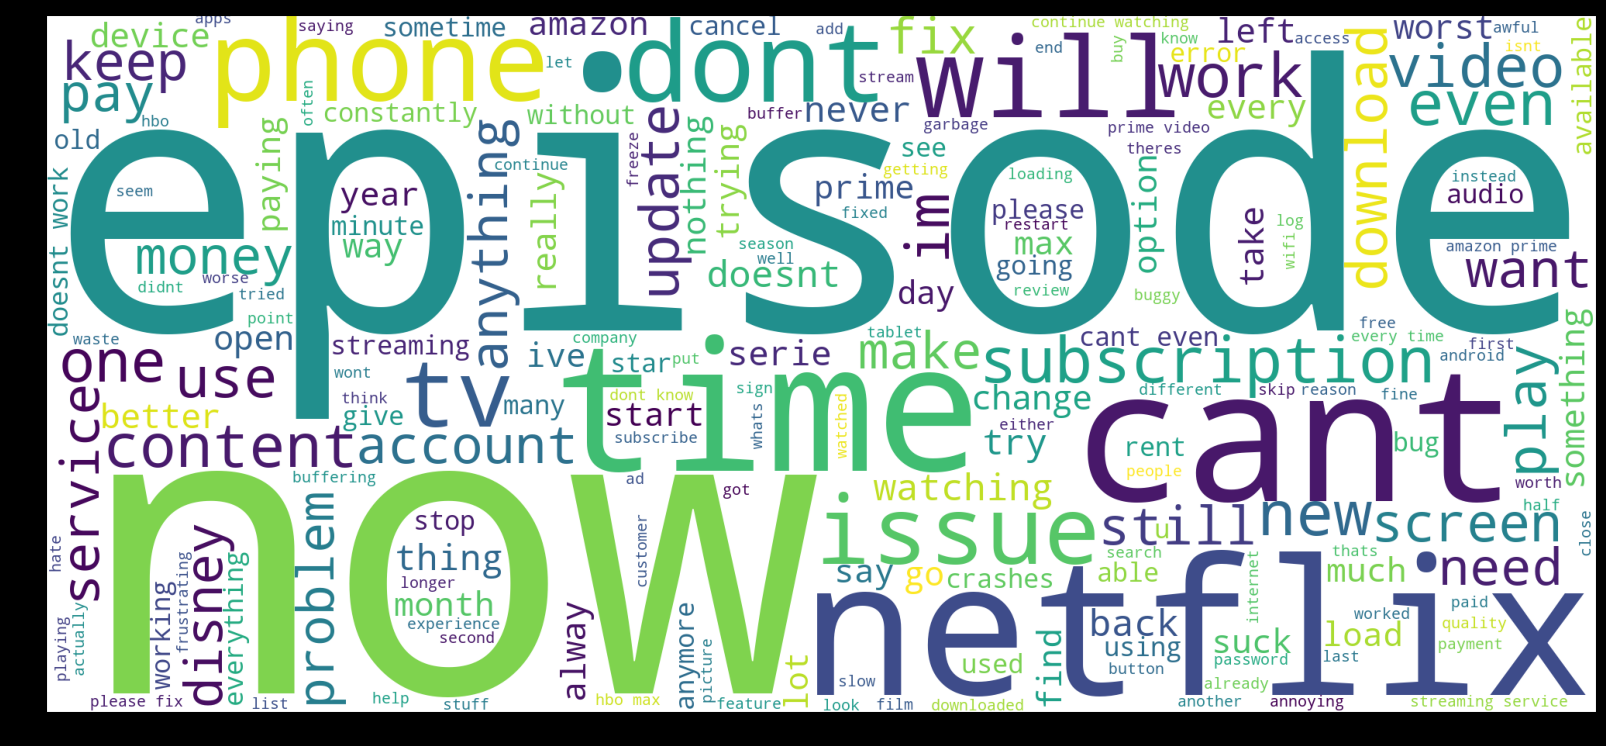

In [24]:
# negative_content_words
negative_content_words = ' '.join([content for content in topic_content_negative['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(negative_content_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

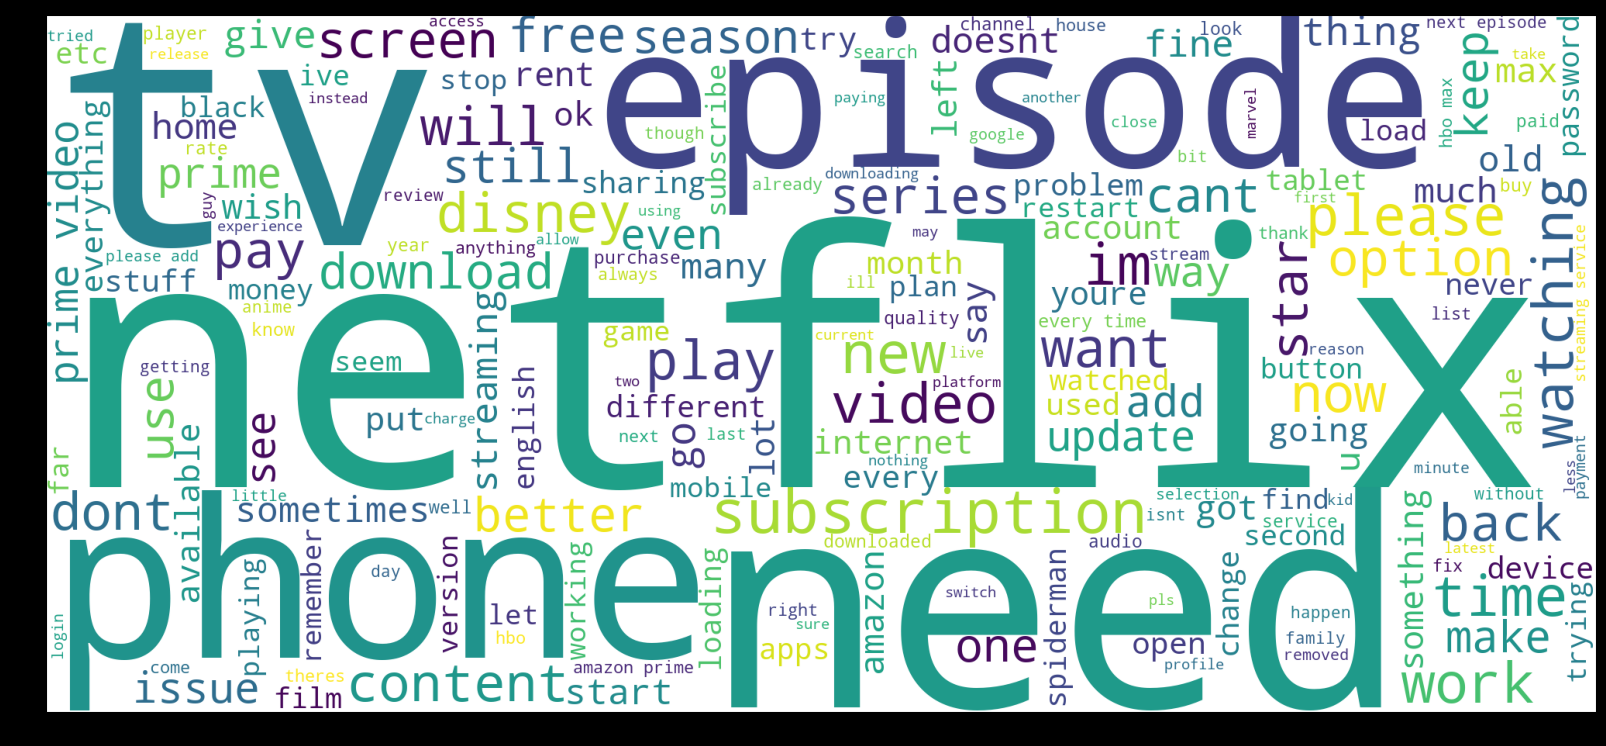

In [25]:
neutral_content_words = ' '.join([content for content in topic_content_neutral['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(neutral_content_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

# UIUX WordClouds

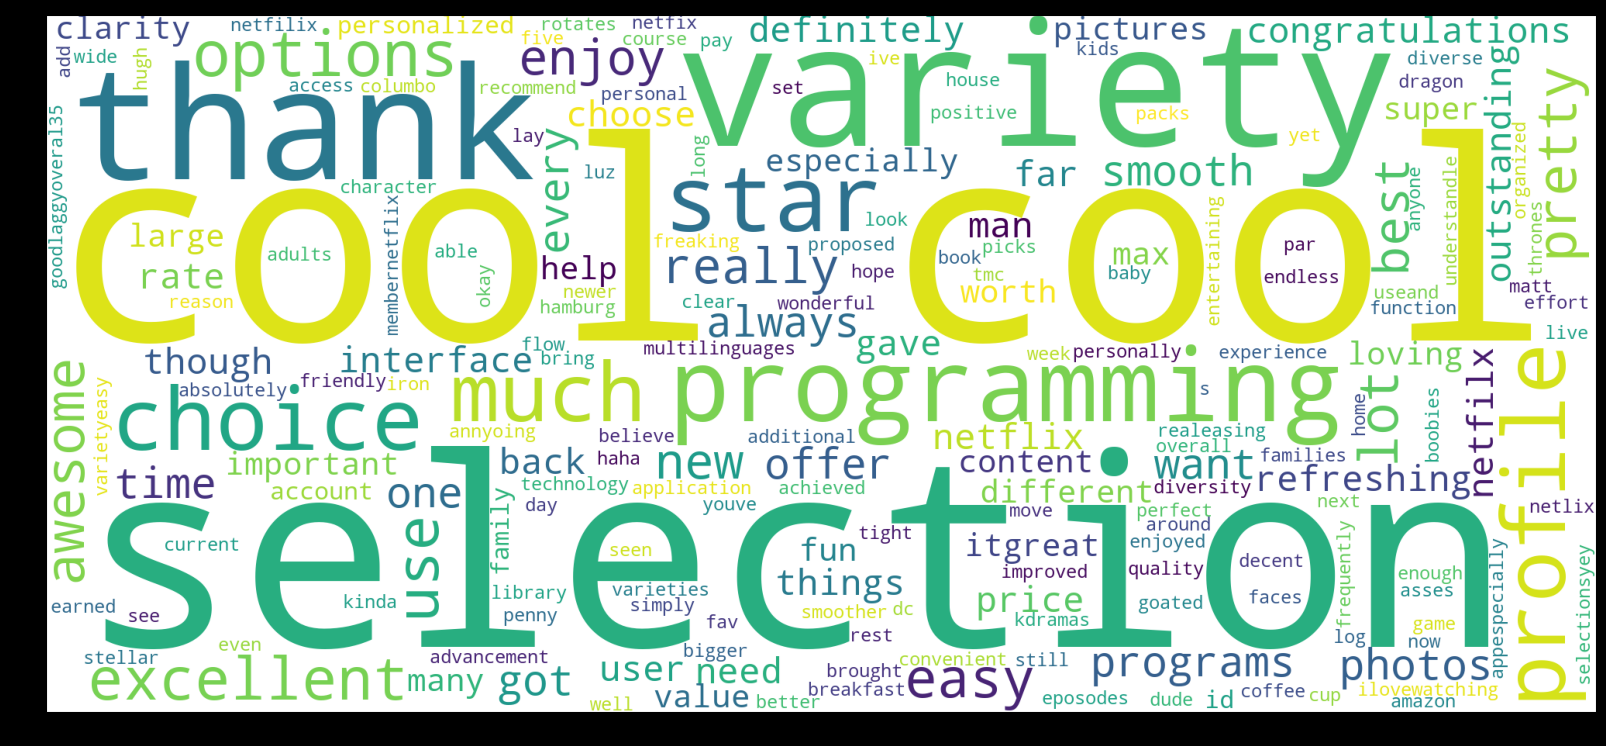

In [26]:
positive_ui_words = ' '.join([content for content in topic_UIUX_positive['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(positive_ui_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

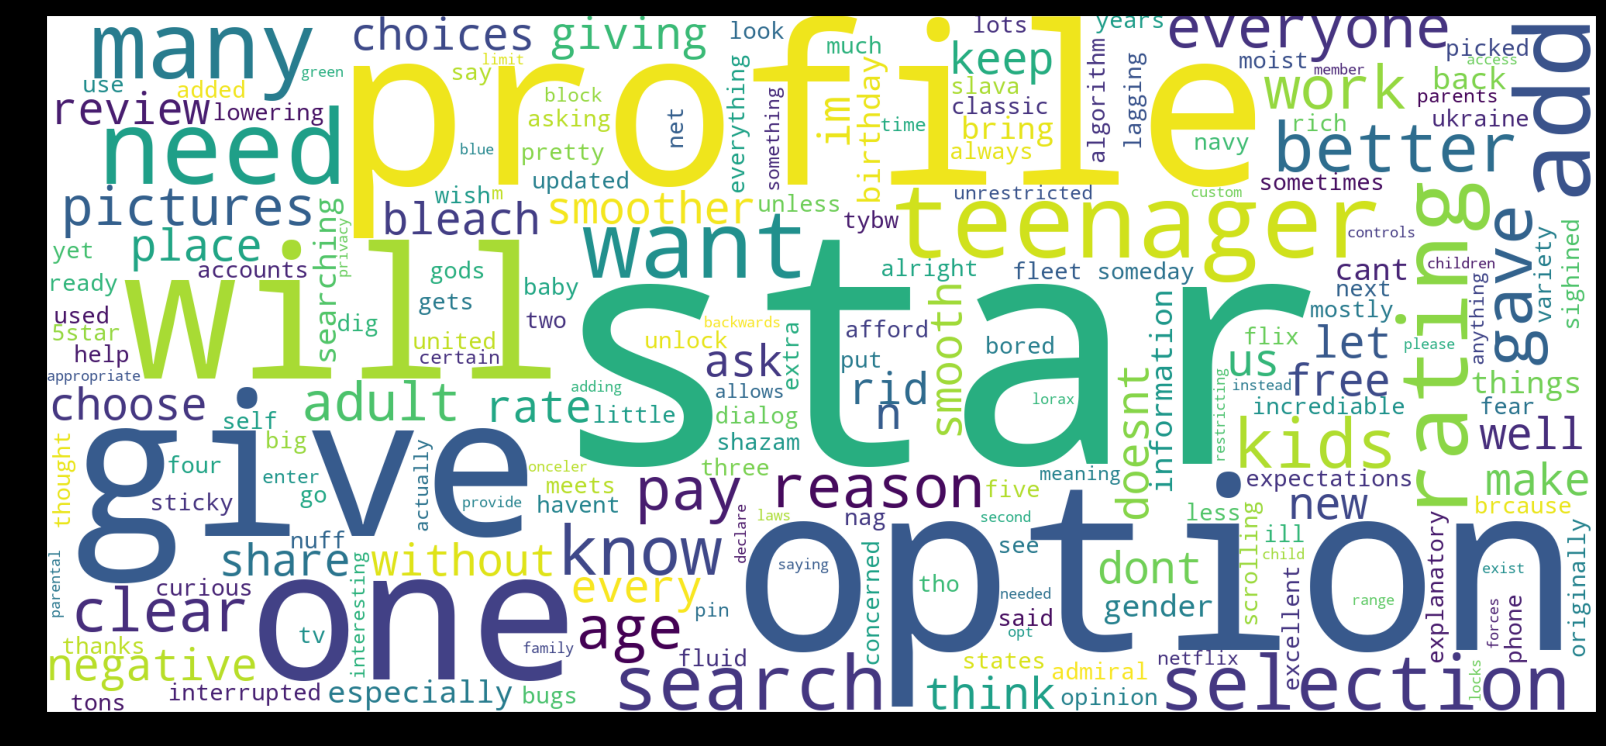

In [27]:
neutral_ui_words = ' '.join([content for content in topic_UIUX_neutral['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(neutral_ui_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

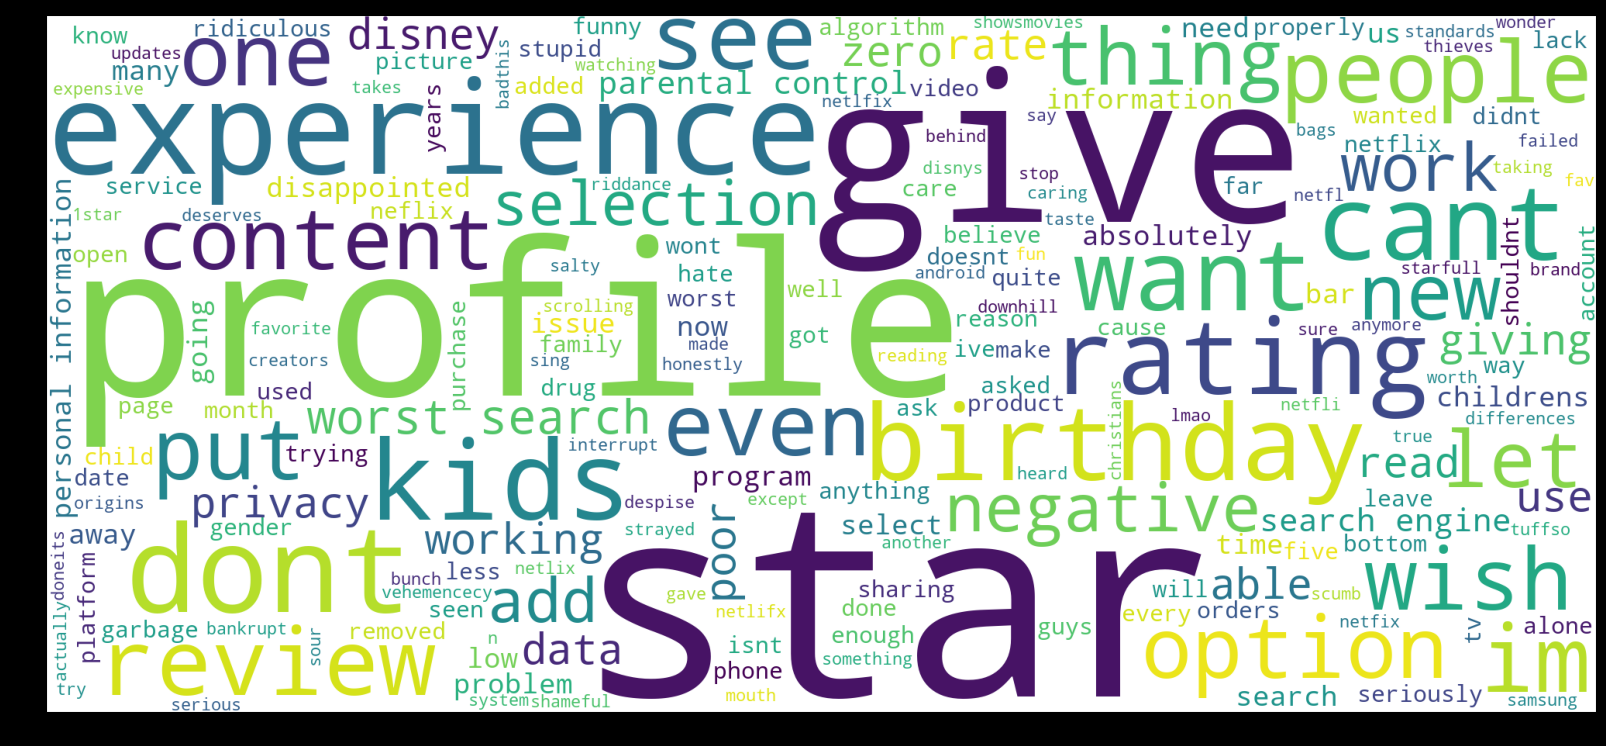

In [28]:
negative_ui_words = ' '.join([content for content in topic_UIUX_negative['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(negative_ui_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

# Platform WordClouds

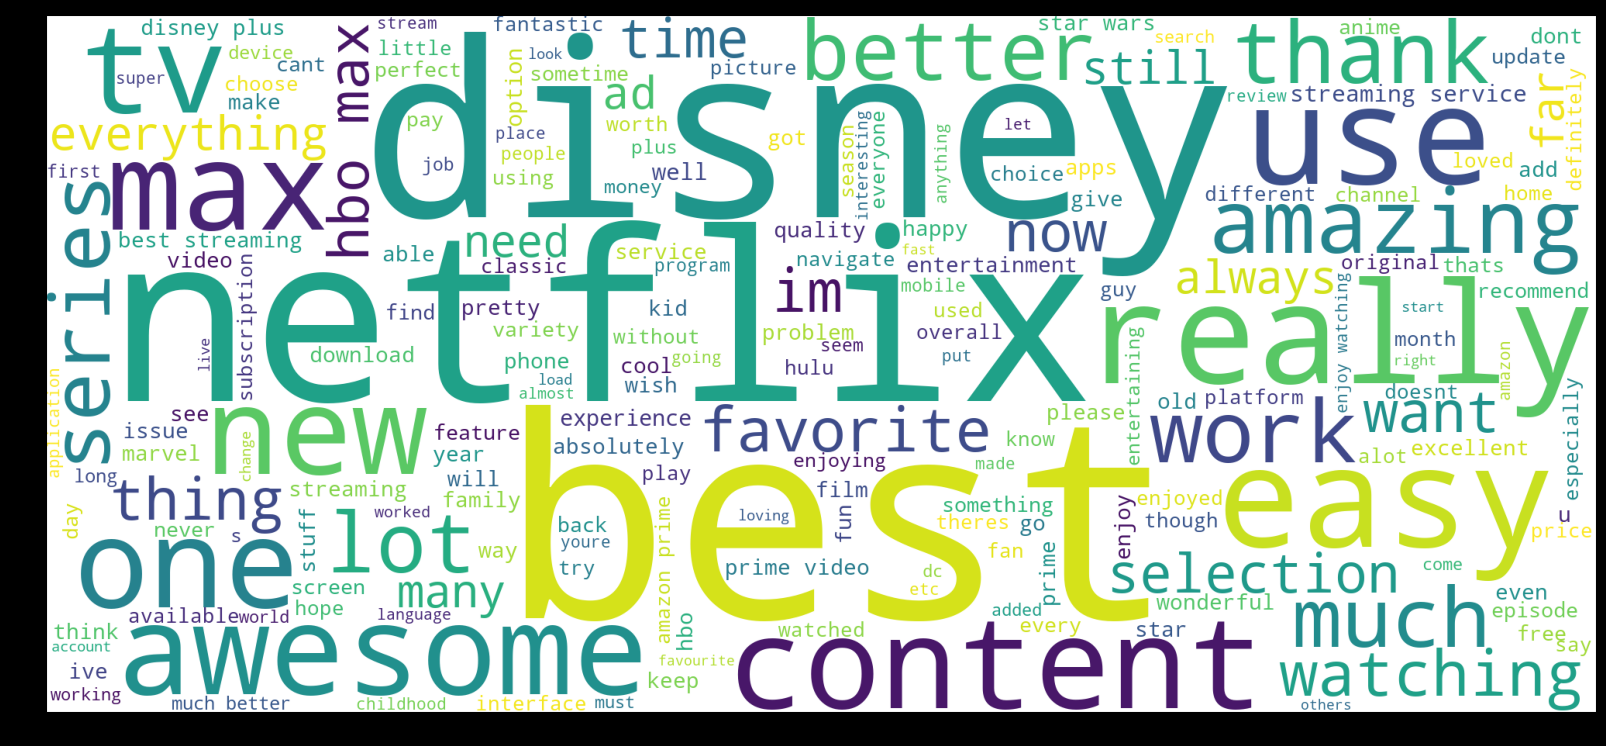

In [29]:
positive_platform_words = ' '.join([content for content in topic_platform_positive['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(positive_platform_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

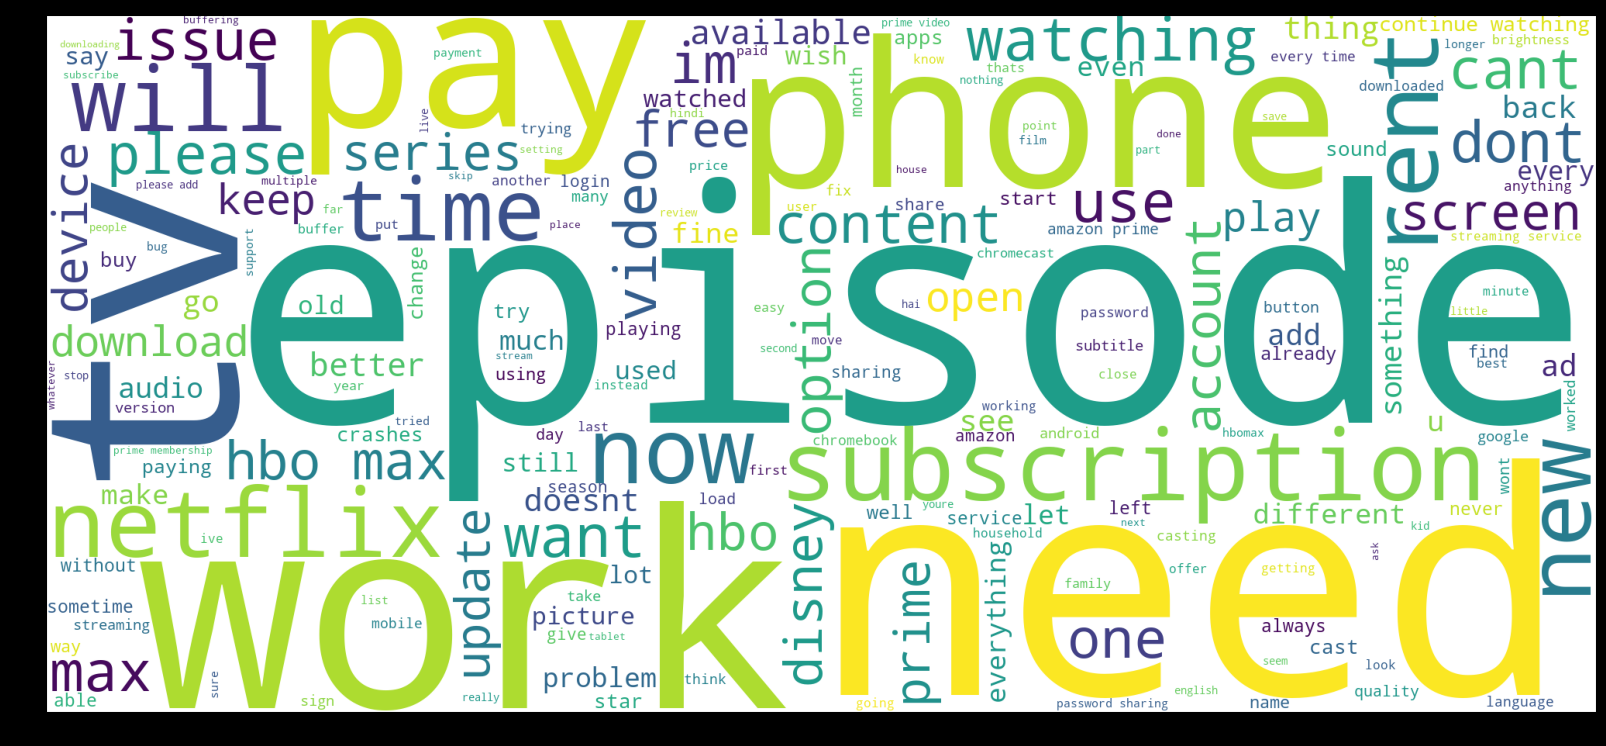

In [30]:
neutral_platform_words = ' '.join([content for content in topic_platform_neutral['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(neutral_platform_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

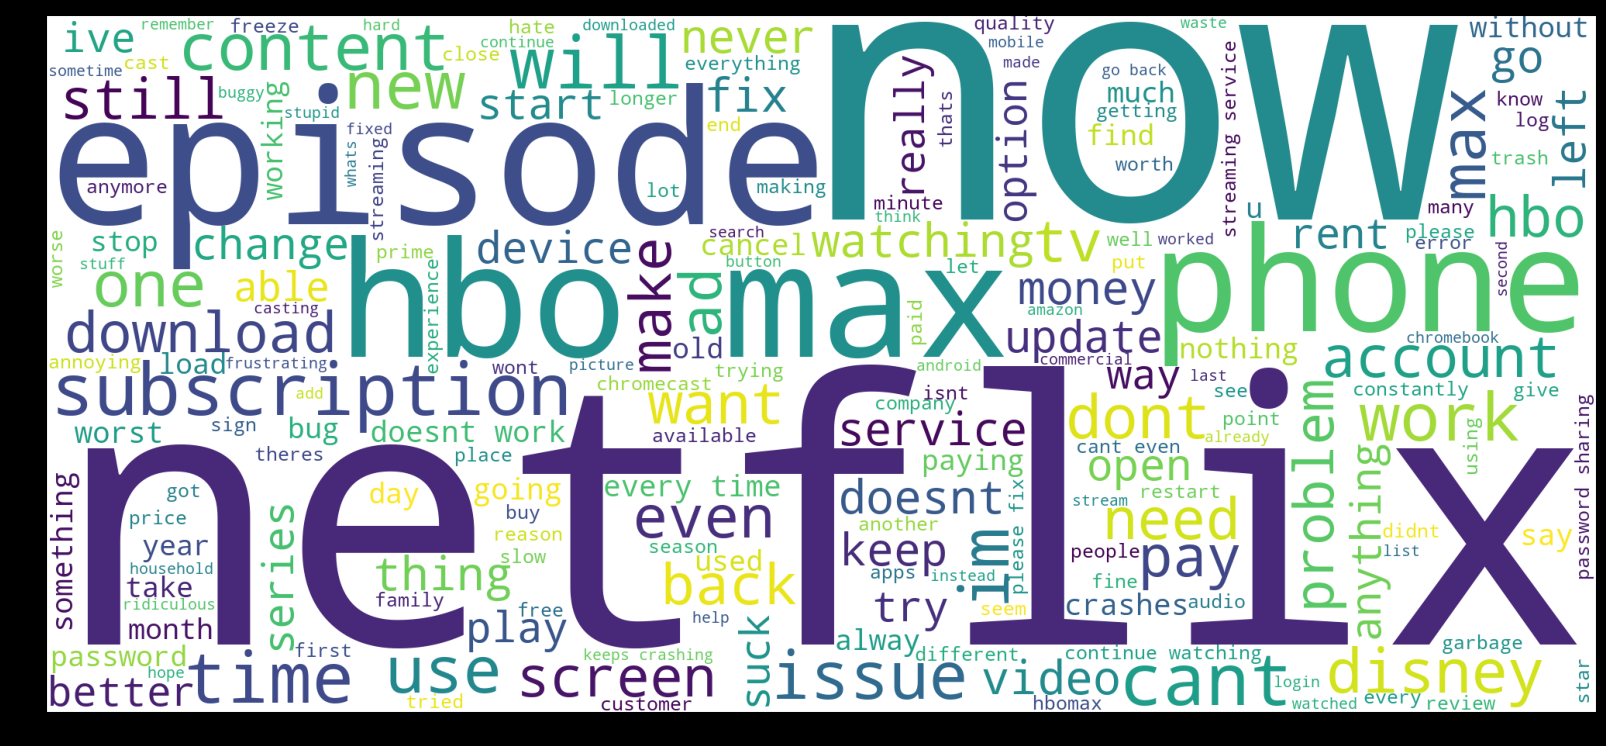

In [31]:
negative_platform_words = ' '.join([content for content in topic_platform_negative['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(negative_platform_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

# Price WordClouds

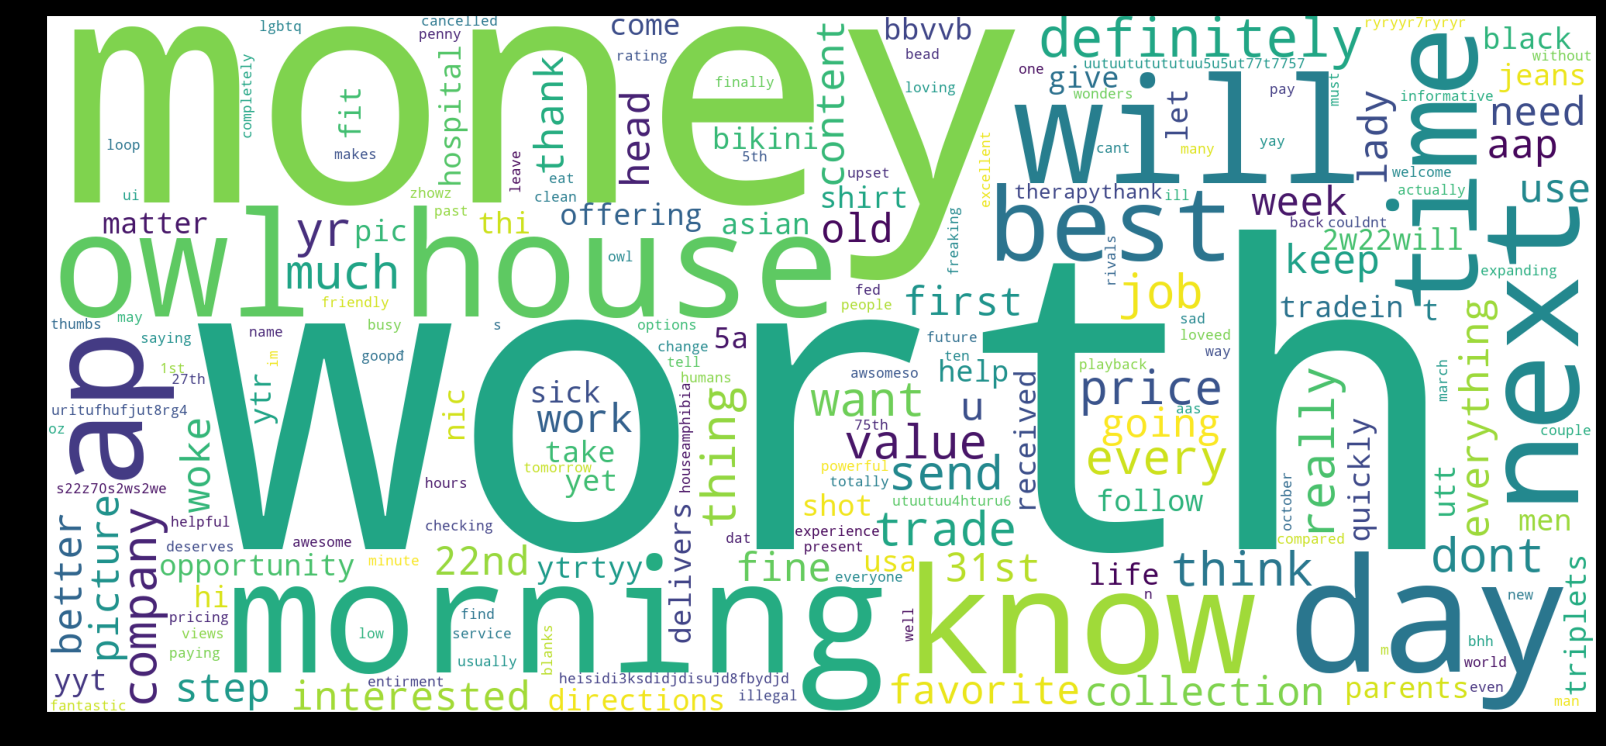

In [32]:
positive_price_words = ' '.join([content for content in topic_price_positive['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(positive_price_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

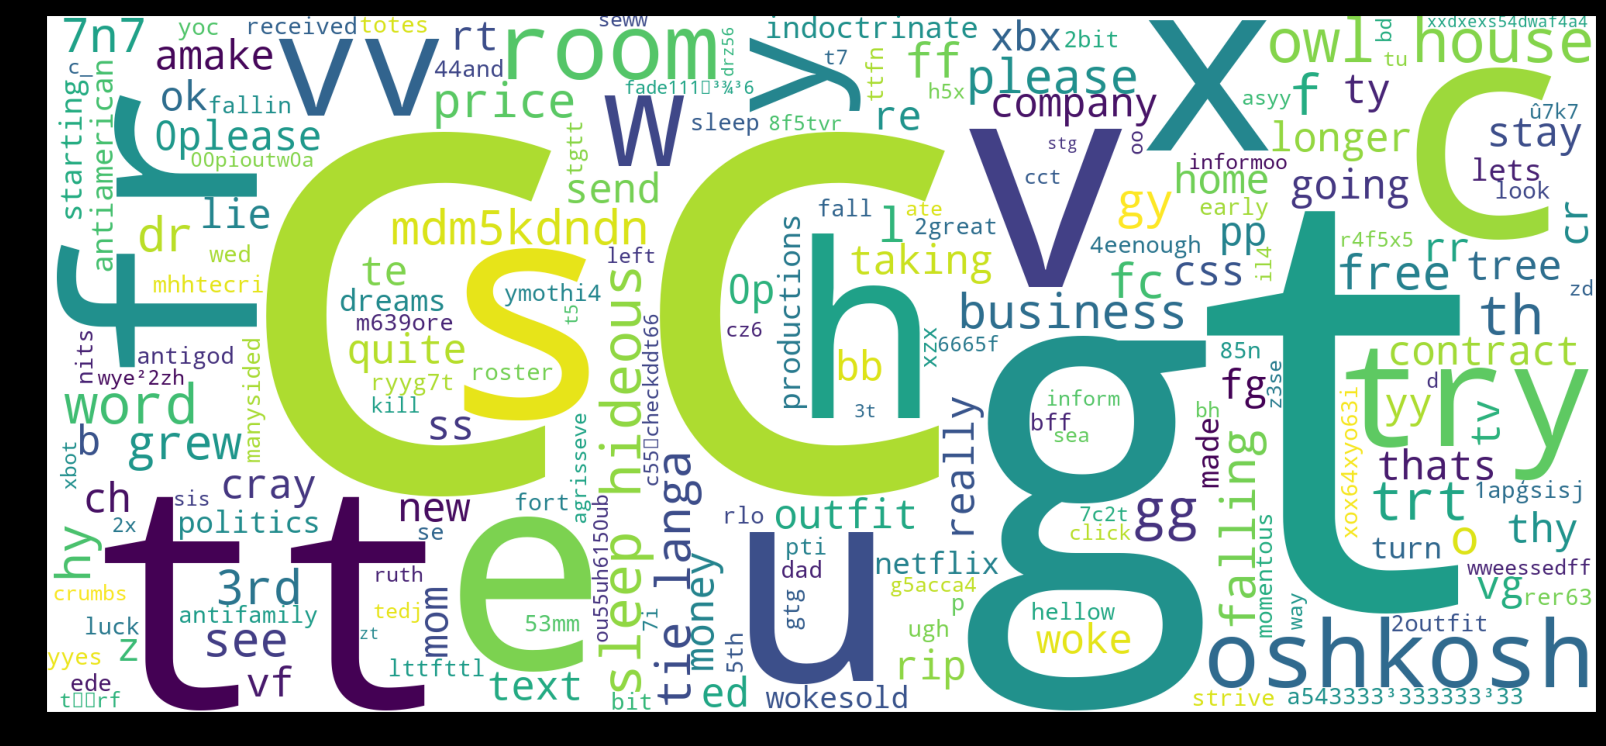

In [33]:
neutral_price_words = ' '.join([content for content in topic_price_neutral['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(neutral_price_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

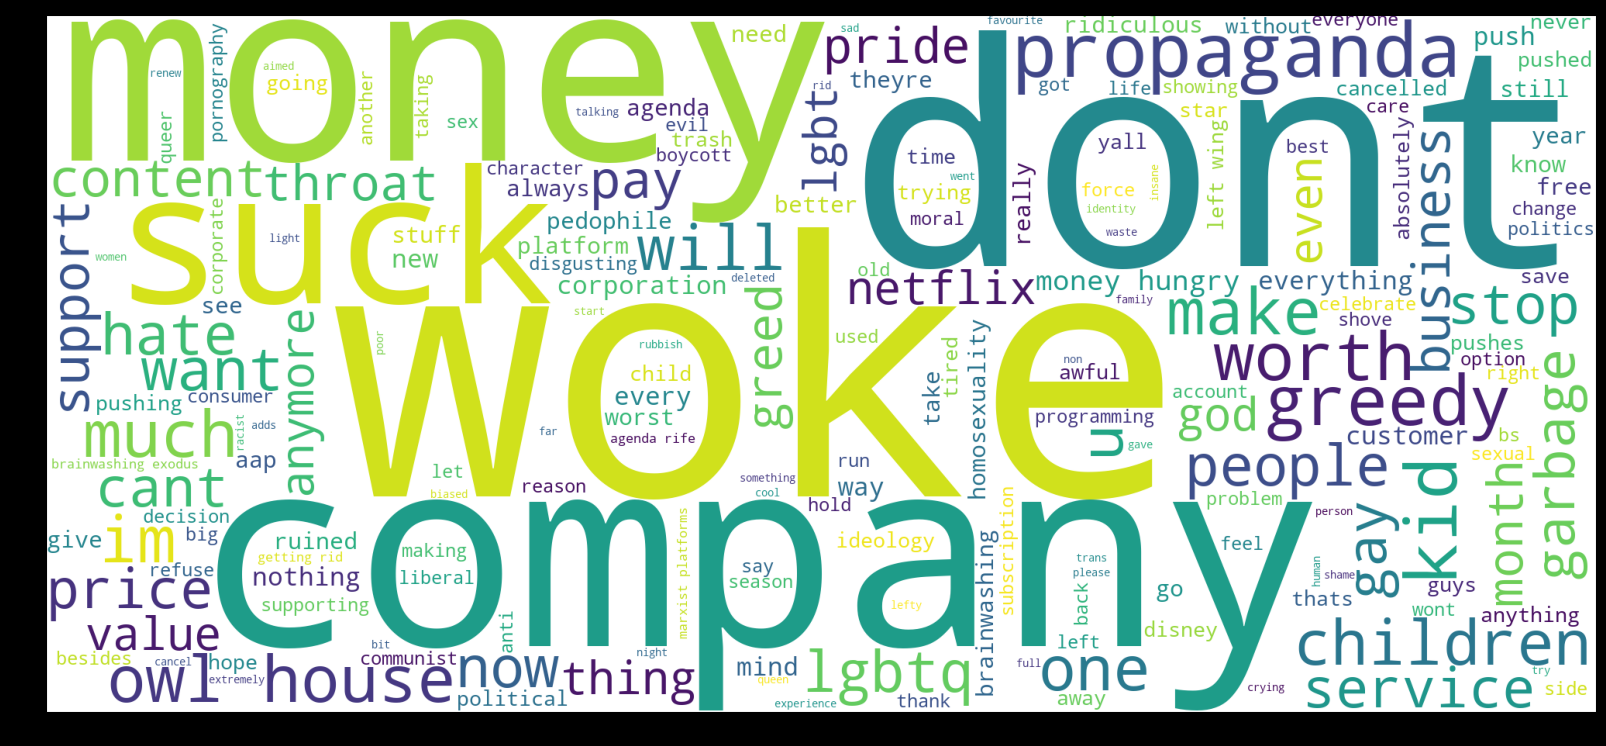

In [34]:
negative_price_words = ' '.join([content for content in topic_price_negative['content']])
stopwords = set(STOPWORDS)
extra_words = ['app', 'show','shows', 'movie','movies','good','love','great','nice',
               'terrible','bad','horrible','watch'] # adding specific words to remove noise
stopwords.update(extra_words)
wordCloud = WordCloud(width=2000, height=900, background_color ='white',
                stopwords = stopwords,).generate(negative_price_words)

plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordCloud)
plt.show()

In [35]:
Final_Table

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  Unnamed: 0_x  \
0                 0             0           0             0   
1                 1             1           1             4   
2                 2             2           2             5   
3                 3             3           3            14   
4                 4             4           4            27   
...             ...           ...         ...           ...   
20838         20838         20838       20838         11631   
20839         20839         20839       20839         12219   
20840         20840         20840       20840         12796   
20841         20841         20841       20841         13076   
20842         20842         20842       20842         13633   

                                   reviewId                         userName  \
0      bea12a69-44c2-4d0a-a656-ae65e28ee479                     Sarah Fraley   
1      d714d622-0d95-47b3-a25a-8afdc201a0d6                      Priya Suman   
2      53341e56-1415-4192-9c8d-618f7e573359                     Dagar Gaming   
3      db750a18-3b85-4763-8a02-3751a2545c19                        inba hari   
4      2fa998b1-6b13-4145-94c6-99e8ed586495                      Ambar Singh   
...                                     ...                              ...   
20838  b41b06bd-31c4-47a5-9dcf-c859b2eab2d5                  Garrick Hockett   
20839  6c491c57-eab3-4a63-aa75-7956c2f14981  John Edwin Griffin (j2dagriffs)   
20840  f0af42c4-849f-42a5-89f6-5c393f810d72                    Victoria Kemp   
20841  fa37ba0d-d37c-4876-bbdd-e0670ca8b335                       Chloe Hogh   
20842  40177936-3763-4940-9f57-8f865f5bae43       Renny Jesús Guillén Rujano   

                                               userImage  \
0      https://play-lh.googleusercontent.com/a-/AD_cM...   
1      https://play-lh.googleusercontent.com/a-/AD_cM...   
2      https://play-lh.googleusercontent.com/a-/AD_cM...   
3      https://play-lh.googleusercontent.com/a-/AD_cM...   
4      https://play-lh.googleusercontent.com/a-/AD_cM...   
...                                                  ...   
20838  https://play-lh.googleusercontent.com/a-/AD_cM...   
20839  https://play-lh.googleusercontent.com/a-/AD_cM...   
20840  https://play-lh.googleusercontent.com/a-/AD_cM...   
20841  https://play-lh.googleusercontent.com/a-/AD_cM...   
20842  https://play-lh.googleusercontent.com/a-/AD_cM...   

                                                 content  score  \
0      i stream on my phone a lot and the videos wont...      1   
1      i have no downloads on any device and it still...      1   
2      its good but movies i search ont it are 98 not...      3   
3                                       worst experience      1   
4      there is glitch while streaming the video gets...      1   
...                                                  ...    ...   
20838  wish i could watch anything without buffering ...      2   
20839            doesnt play episodes of the mandalorian      1   
20840  mandalorian will not play right stops to load ...      2   
20841  disney is a place where i can watch tons of mo...      5   
20842  chapter 4 of the mandalorian third season is j...      3   

       thumbsUpCount  ... RoBERTa_lbl Unnamed: 0_y Count  \
0                  0  ...    negative            0  7647   
1                  0  ...    negative            0  7647   
2                  0  ...    negative            0  7647   
3                  0  ...    negative            0  7647   
4                  0  ...    negative            0  7647   
...              ...  ...         ...          ...   ...   
20838              0  ...    negative           26    12   
20839              0  ...    negative           26    12   
20840              0  ...    negative           26    12   
20841              1  ...    positive           26    12   
20842              0  ...    negative           26    12   

                                          

In [39]:
topics = Final_Table[['Name','Representation','topic_group']]
topics = topics.groupby('Representation')
topics.first()


Name  \
Representation                                                                                          
['aap love ap', 'aap bad', 'bad aap', 'aap aap ...         21_aap love ap_aap bad_bad aap_aap aap bad   
['awesome thanks', 'awesome thanks awesome', 'a...  20_awesome thanks_awesome thanks awesome_aweso...   
['bad experience', 'horrible bad experience', '...  12_bad experience_horrible bad experience_bad ...   
['cleopatra isnt black', 'cleopatra wasnt black...  8_cleopatra isnt black_cleopatra wasnt black_c...   
['cool', 'cool cool', 'alright cool', 'cool alr...         7_cool_cool cool_alright cool_cool alright   
['corporate greed', 'money hungry corporation',...  3_corporate greed_money hungry corporation_gre...   
['dont like adds', 'like adds adds', 'adds adds...  27_dont like adds_like adds adds_adds adds tho...   
['fr vv', 'vg', 'gg', 'tt', 'cr', 'fr', 'trt tr...                                   2_fr vv_vg_gg_tt   
['hai netflix', 'hota hai', 'ka kya', 'ke liye ...        11_hai netflix_hota hai_ka kya_ke liye alag   
['hbo max app', 'max app', 'hbo max', 'chromeca...           0_hbo max app_max app_hbo max_chromecast   
['kids profile', 'parental controls', 'old kids...  13_kids profile_parental controls_old kids pro...   
['love netlix', 'love netlix realeasing', 'netl...  24_love netlix_love netlix realeasing_netlix g...   
['nice good clarity', 'understandle shown clear...  15_nice good clarity_understandle shown clear_...   
['owl house hate', 'owl house', 'love owl house...  14_owl house hate_owl house_love owl house_owl...   
['pay woke communist', 'woke communist propagan...  4_pay woke communist_woke communist propaganda...   
['picture doesnt work', 'picture feature doesnt...  10_picture doesnt work_picture feature doesnt_...   
['pip android', 'version pip android', 'pip and...  23_pip android_version pip android_pip android...   
['price lgbtq pushed', 'promotes way lgbtq', 'p...  6_price lgbtq pushed_promotes way lgbtq_people...   
['programming easy use', 'interface great progr...  19_programming easy use_interface great progra...   
['really enjoy platform', 'platform really enjo...  22_really enjoy platform_platform really enjoy...   
['selection love itgreat', 'great selection goo...  1_selection love itgreat_great selection good_...   
['share personal information', 'personal inform...  26_share personal information_personal informa...   
['sixs logonothin', 'sixs logonothin like', 'pa...  16_sixs logonothin_sixs logonothin like_pay at...   
['spiderman movies marvel', 'rewatch spiderman ...  28_spiderman movies marvel_rewatch spiderman m...   
['stars rating', 'reviews stars', 'rating star'...  5_stars rating_reviews stars_rating star_ratin...   
['subscription', 'netflix', 'app', 'apps', 'str...                   -1_subscription_netflix_app_apps   
['sucks', 'sucks sucks', 'sucks ths sucks', 'su...  18_sucks_sucks sucks_sucks ths sucks_sucks suc...   
['watch seasons mandalorian', 'play episodes ma...  25_watch seasons mandalorian_play episodes man...   
['worst search engine', 'bad search properly', ...  17_worst search engine_bad search properly_sea...   
['worth money', 'worth worth money', 'worth wor...  9_worth money_worth worth money_worth worth pa...   

                                                                      topic_group  
Representation                                                                     
['aap love ap', 'aap bad', 'bad aap', 'aap aap ...                          Price  
['awesome thanks', 'awesome thanks awesome', 'a...  User Experience and Interface  
['bad experience', 'horrible bad experience', '...  User Experience and Interface  
['cleopatra isnt black', 'cleopatra wasnt black...            TV Shows and Movies  
['cool', 'cool cool', 'alright cool', 'cool alr...  User Experience and Interface  
['corporate greed', 'money hungry corporation',...                          Price  
['dont like adds', 'like adds adds', 'adds adds...  User Experie

In [41]:
toplist = topics.first()

In [43]:
toplist.to_csv('topic_list.csv')